### Testing Model Assumptions Example 2.15
For the **Income** data set the residual plots are displayed in the Figure below.

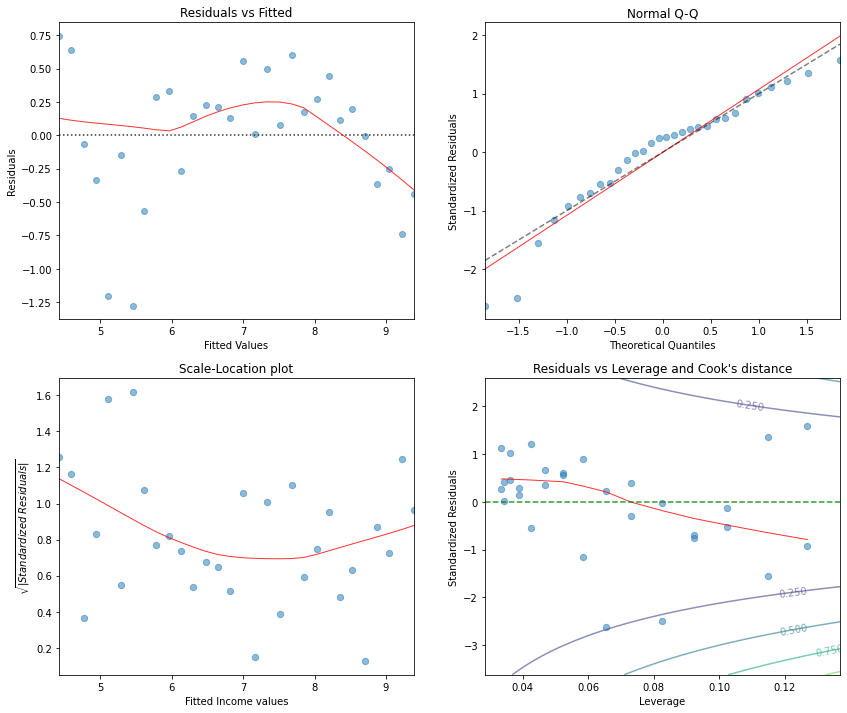

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from TMA_def import *

# Read data
df = pd.read_csv('./data/Income.csv')
x = df['education']
y = df['income']

""" Find Predictions, Residuals and Influence on the Residuals """
# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(np.sqrt(y), x_sm).fit()

# Find the predicted values for the original design.
yfit = model.fittedvalues
# Find the Residuals
res = model.resid
# Influence of the Residuals
res_inf = model.get_influence()
# Studentized residuals using variance from OLS
res_standard = res_inf.resid_studentized_internal
# Absolute square root Residuals:
res_stand_sqrt = np.sqrt(np.abs(res_standard))
# Cook's Distance and leverage:
res_inf_cooks = res_inf.cooks_distance
res_inf_leverage = res_inf.hat_matrix_diag


""" Plots """
# Create Figure and subplots
fig = plt.figure(figsize = (14,12))

# First subplot Residuals vs Fitted values
ax1 = fig.add_subplot(2, 2, 1)
plot_residuals(ax1, yfit, res)

# Second subplot Q-Q Plot
ax2 = fig.add_subplot(2, 2, 2)
plot_QQ(ax2, res_standard)

# Third subplot: Scale location
ax3 = fig.add_subplot(2, 2, 3)
plot_scale_loc(ax3, yfit, res_stand_sqrt, x_lab='Fitted Income values')

# Fourth subplot: Cook's distance
ax4 = fig.add_subplot(2, 2, 4)
x_min, x_max = min(res_inf_leverage) - 0.005, max(res_inf_leverage) + 0.01
y_min, y_max = min(res_standard) - 1, max(res_standard) + 1
plot_cooks(ax4, res_inf_leverage, res_standard, n_pred=1, 
          x_lim=[x_min, x_max], y_lim=[y_min, y_max])

# Show plot
# plt.tight_layout()
plt.show()